To speed the execution procces, Colaboraty has an option to use GPU. This option is selected by default.

# How to study the MIAS dataset

In this notebook, we illustrate how FrImCla can be employed to classify images. We have to train the framework to make these classifications. In particular, we use the dataset provided for the Mammographic Image Analysis Society (MIAS) - from now on we will call this dataset, the MIAS dataset.

The MIAS dataset consist in 322 mammographic images, including 113 images with abnormalities and 209 without abnormalities. You can find more information in the following link: 

https://www.repository.cam.ac.uk/handle/1810/250394

This dataset can be downloaded by executing the following command.

In [0]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

--2019-03-19 10:27:59--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.113, 74.125.141.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download [following]
--2019-03-19 10:27:59--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/269n3psjp6fsdtacdhsni4e25ase1a6n/1552989600000/05147614325801676241/*/1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ?e=download [following]
--2019-03-19 10:28:02--  https://doc-0g-3s-docs.googleusercontent.com/docs/securesc

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [0]:
!pip3 install frimcla

We need some libraries to execute this framework and obtain the results. 

In [0]:
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction

Using TensorFlow backend.


### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [0]:
datasetPath = "./Mias"
outputPath = "./output"
# featureExtractors = [["inception", "False"]]
batchSize = 32 
verbose = False
# modelClassifiers = [ "MLP","SVM","KNN"] #You can use MLP, SVM, KNN , LogisticRegression or RandomForest
measure = "accuracy" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10


In the next section we have to select the feature extractors that we want to use (It is mandatory to **select at least one option**)

In [0]:
VGG16 = True #@param {type:"boolean"}
VGG19 = True #@param {type:"boolean"}
ResNet = True #@param {type:"boolean"}
Inception = True #@param {type:"boolean"}
GoogleNet = True #@param {type:"boolean"}
Overfeat = True #@param {type:"boolean"}
Xception = True #@param {type:"boolean"}
Densenet = True #@param {type:"boolean"}
LAB888 = True #@param {type:"boolean"}
LAB444 = True #@param {type:"boolean"}
HSV888 = True #@param {type:"boolean"}
HSV444 = True #@param {type:"boolean"}
Haralick = True #@param {type:"boolean"}
Hog = True #@param {type:"boolean"}
Haarhog = True #@param {type:"boolean"}

featureExtractors = []

if VGG19 :
  featureExtractors.append(["vgg19","False"])
if VGG16 :
  featureExtractors.append(["vgg16","False"])
if ResNet :
  featureExtractors.append(["resnet","False"])
if Inception :
  featureExtractors.append(["inception","False"])
if GoogleNet :
  featureExtractors.append(["googlenet"])
if Overfeat :
  featureExtractors.append(["overfeat","[-3]"])
if Xception :
  featureExtractors.append(["xception","False"])
if Densenet :
  featureExtractors.append(["densenet"])
if LAB888 :
  featureExtractors.append(["lab888"])
if LAB444 :
  featureExtractors.append(["lab444","4,4,4"])
if HSV888 :
  featureExtractors.append(["hsv888"])
if HSV444 :
  featureExtractors.append(["hsv444","4,4,4"])
if Haralick :
  featureExtractors.append(["haralick"])
if Hog :
  featureExtractors.append(["hog"])
if Haarhog :
  featureExtractors.append(["haarhog"])

Now we have to indicate the classifier models that we want to use (It is mandatory to **select at least one option**)

In [0]:
MLP = True #@param {type:"boolean"}
SVM = True #@param {type:"boolean"}
KNN = True #@param {type:"boolean"}
LogisticRegression = True #@param {type:"boolean"}
GradientBoost = True #@param {type:"boolean"}
RandomForest = True #@param {type:"boolean"}

modelClassifiers = []


if MLP :
  modelClassifiers.append("MLP")
if SVM :
  modelClassifiers.append("SVM")
if KNN :
  modelClassifiers.append("KNN")
if LogisticRegression :
  modelClassifiers.append("LogisticRegression")
if GradientBoost :
  modelClassifiers.append("GradientBoost")
if RandomForest :
  modelClassifiers.append("RandomForest")

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [0]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

[INFO] loading ['inception', 'False']...
Instructions for updating:
Colocations handled automatically by placer.
[WARN] minimum init buffer not reached - 2019-03-19 10:32:12.911769
[INFO] creating datasets... - 2019-03-19 10:32:12.911958
[INFO] writing un-empty buffers... - 2019-03-19 10:32:12.913071
[INFO] writing `image_ids` buffer - 2019-03-19 10:32:12.913235
[INFO] writing `features` buffer - 2019-03-19 10:32:12.914783
[INFO] compacting datasets... - 2019-03-19 10:32:12.918660
[INFO] old size of `image_ids`: 296; new size: 296 - 2019-03-19 10:32:12.918833
[INFO] old size of `features`: 296; new size: 296 - 2019-03-19 10:32:12.918912


### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

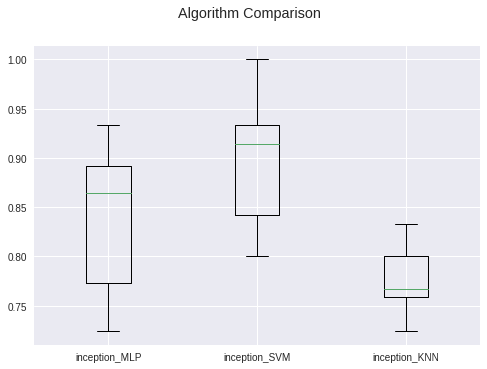

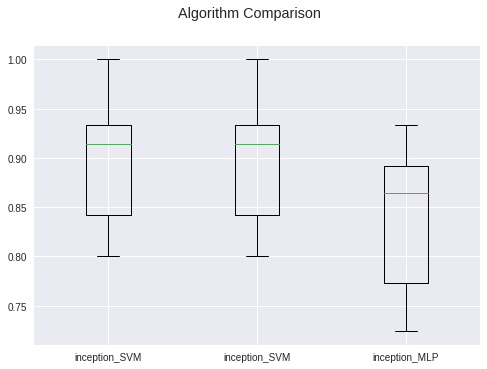

In [0]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In this function FrImCla asks the user if he/she wants a web application or not (Y if the user wants the webapp). This web application uses the best model selected by FrImCla for this problem. The application generated is very simple and only contains a text box and a button to predict the class of new images. FrImCla generates a zip file that must be decompressed to be used. Inside the folder the user has to open a new terminal in this path and run the following command:

`python3 FlaskApp/app.py`

The comand executes the web application in http://localhost:5000/ To use the application the user has to write open the link in his/her browser.

In [0]:
train(outputPath, datasetPath, trainingSize)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...
[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'C': 1000}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier.

In [0]:
image = "./Mias/NORMAL/mdb035.jpg"
featExt = ["inception", "False"]
classi = "MLP"
prediction(featExt, classi, image, outputPath, datasetPath)

[INFO] loading model...
This is not the best model. Are you sure you want to predict with it?
y


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

[INFO] loading ['inception', 'False']...
[INFO] class predicted for the image NORMAL:mdb035.jpg: ['NORMAL']


In [0]:
!cat output/Mias/predictionResults.csv

image_id, /Mias
NORMAL:mdb035.jpg, 1
